In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm

from ficus import FigureManager
from IPython.display import FileLink

import yaml

In [4]:
with open('config.yaml') as fp:
    info = yaml.load(fp)

In [5]:
sns.set(style="ticks")

In [6]:
def get_cdbg_stats_data(filename):
    data = pd.read_csv(filename)
    data['t'] = data['read_n'] / data['read_n'].max()

    cdbg_cols =['n_full', 'n_tips', 'n_islands', 'n_trivial', 'n_circular']
    for col in cdbg_cols:
        data[col + '_p'] = data[col] / data['n_unodes']
    data['dnode_p'] = data['n_dnodes'] / (data['n_unodes'] + data['n_dnodes'])
    data['kmer_p'] = data['n_unique'] / data['n_unique'].max()
    prop_cols = [col + '_p' for col in cdbg_cols] + [ 'kmer_p']
    
    return data, prop_cols

In [7]:
def compute_slope(data, t):
    rise = data[1:].values - data[:-1].values
    run  = t[1:].values - t[:-1].values
    return rise / run

In [8]:
def find_slopes(data, cols):
    slopes = {}
    for col in cols:
        slope_col = 'd_{0}_dt'.format(col)
        slopes[slope_col] = compute_slope(data[col], data['t'])
    return pd.DataFrame(slopes, index=data['t'][1:])

In [9]:
def plot_proportional(stats_filename, sample_name, ax=None):
    data, prop_cols = get_cdbg_stats_data(stats_filename)
    
    def _plot(ax):
        cols = prop_cols + ['t']
        data[cols].plot(x='t', lw=3, ax=ax)
        ax.legend()
        ax.set_title(sample_name)
    
    if ax is not None:
        _plot(ax)
    else:
        with FigureManager(filename=stats_filename + '.proportional.png',
                           figsize=(12,8),
                           show=True) as (fig, ax):
            _plot(ax)

    return data

In [10]:
def plot_frequency(stats_filename, sample_name, ylim=(10,-10), lw=2, logy=False, ax=None):
    data, prop_cols = get_cdbg_stats_data(stats_filename)
    slopes = find_slopes(data, prop_cols)

    def _plot(slopes, ax):
        slopes.plot(ax=ax, lw=lw)
        
        if logy:
            ax.set_yscale('symlog')
        
        top, bottom = ylim
        ax.set_ylim(bottom=bottom, top=top)
        ax.set_title(sample_name)
    
    if ax is not None:
        _plot(slopes, ax)
    else:
        with FigureManager(figsize=(12,8),
                           show=True) as (fig, ax):
            _plot(sloes, ax)

    return data

Compute not finished yet.
Compute not finished yet.
Compute not finished yet.


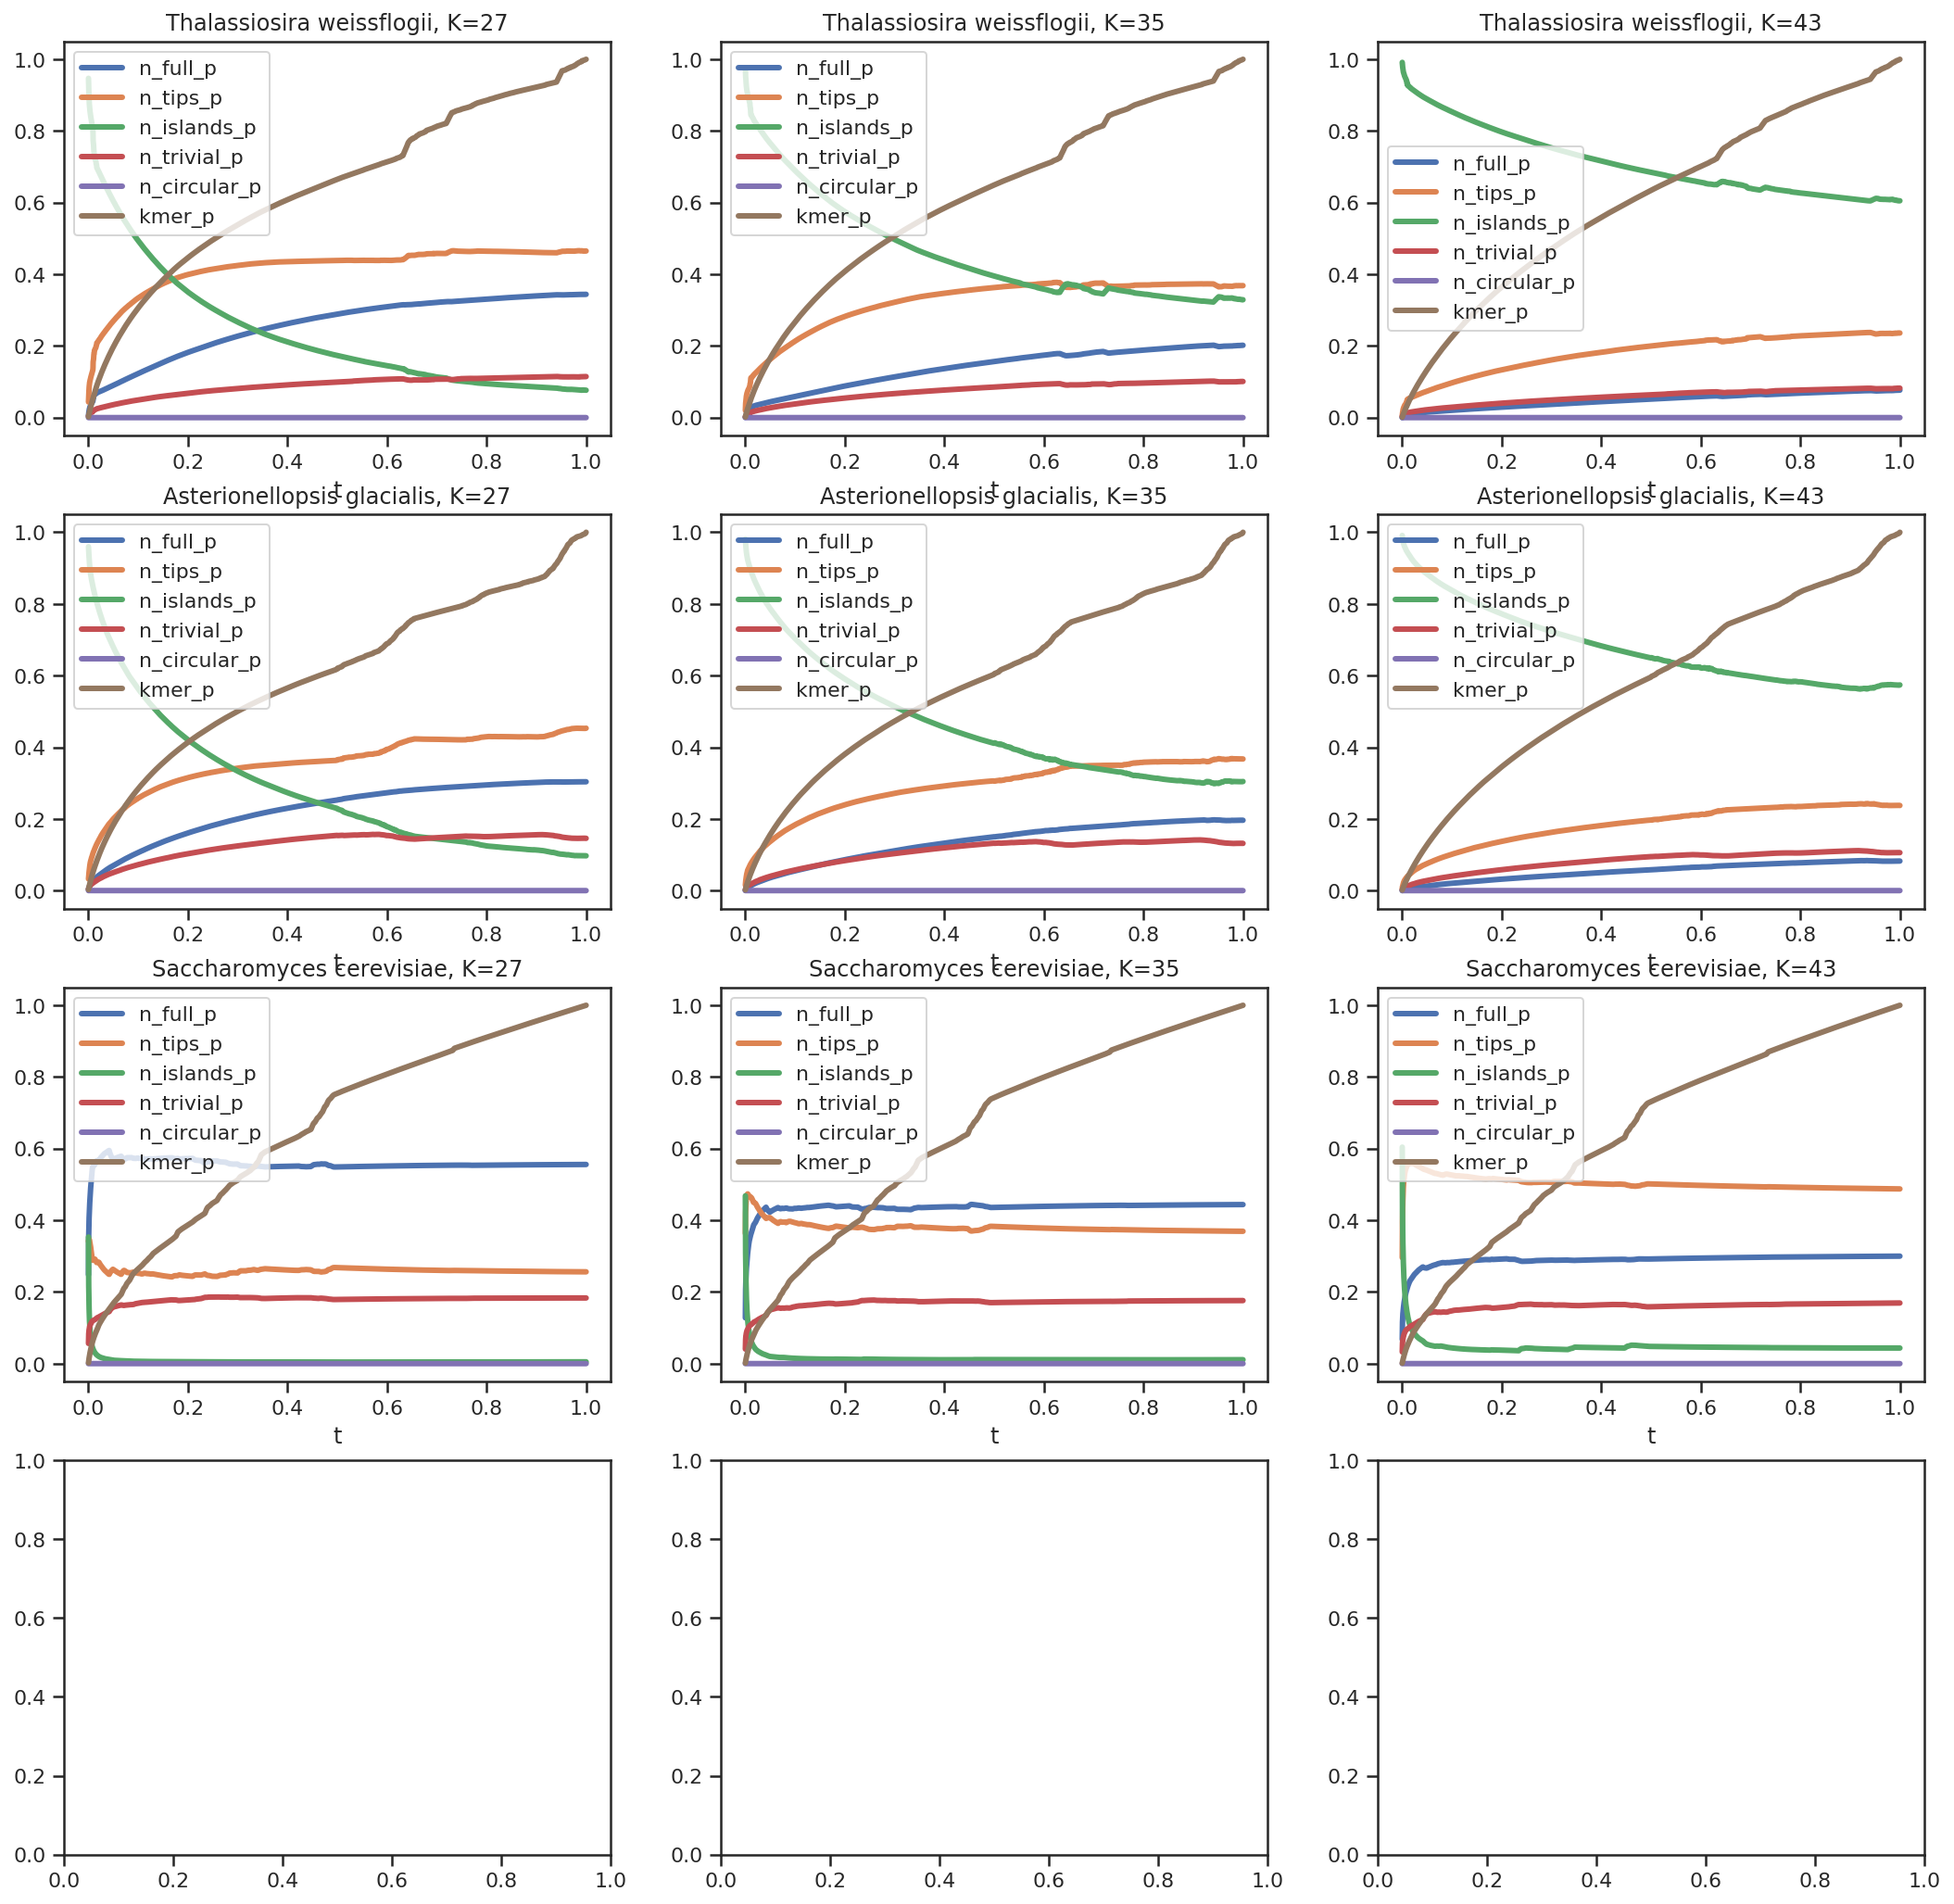

In [17]:
with FigureManager(figsize=(18,18), show=True, nrows=len(info['samples']), ncols=3) as (fig, ax):
    for n, sample_name in enumerate(info['samples']):
        for m, ksize in enumerate(info['samples'][sample_name]['ksizes']):
            directory  = os.path.join('outputs', sample_name, 'node_metrics')
            stats_file = os.path.join(directory, str(ksize), 'boink.cdbg.stats.csv')
            name       = '{0}, K={1}'.format(' '.join(sample_name.split('_')), ksize)

            try:
                plot_proportional(stats_file, name, ax=ax[n][m])
            except FileNotFoundError:
                print('Compute not finished yet.')

Compute not finished yet.
Compute not finished yet.
Compute not finished yet.


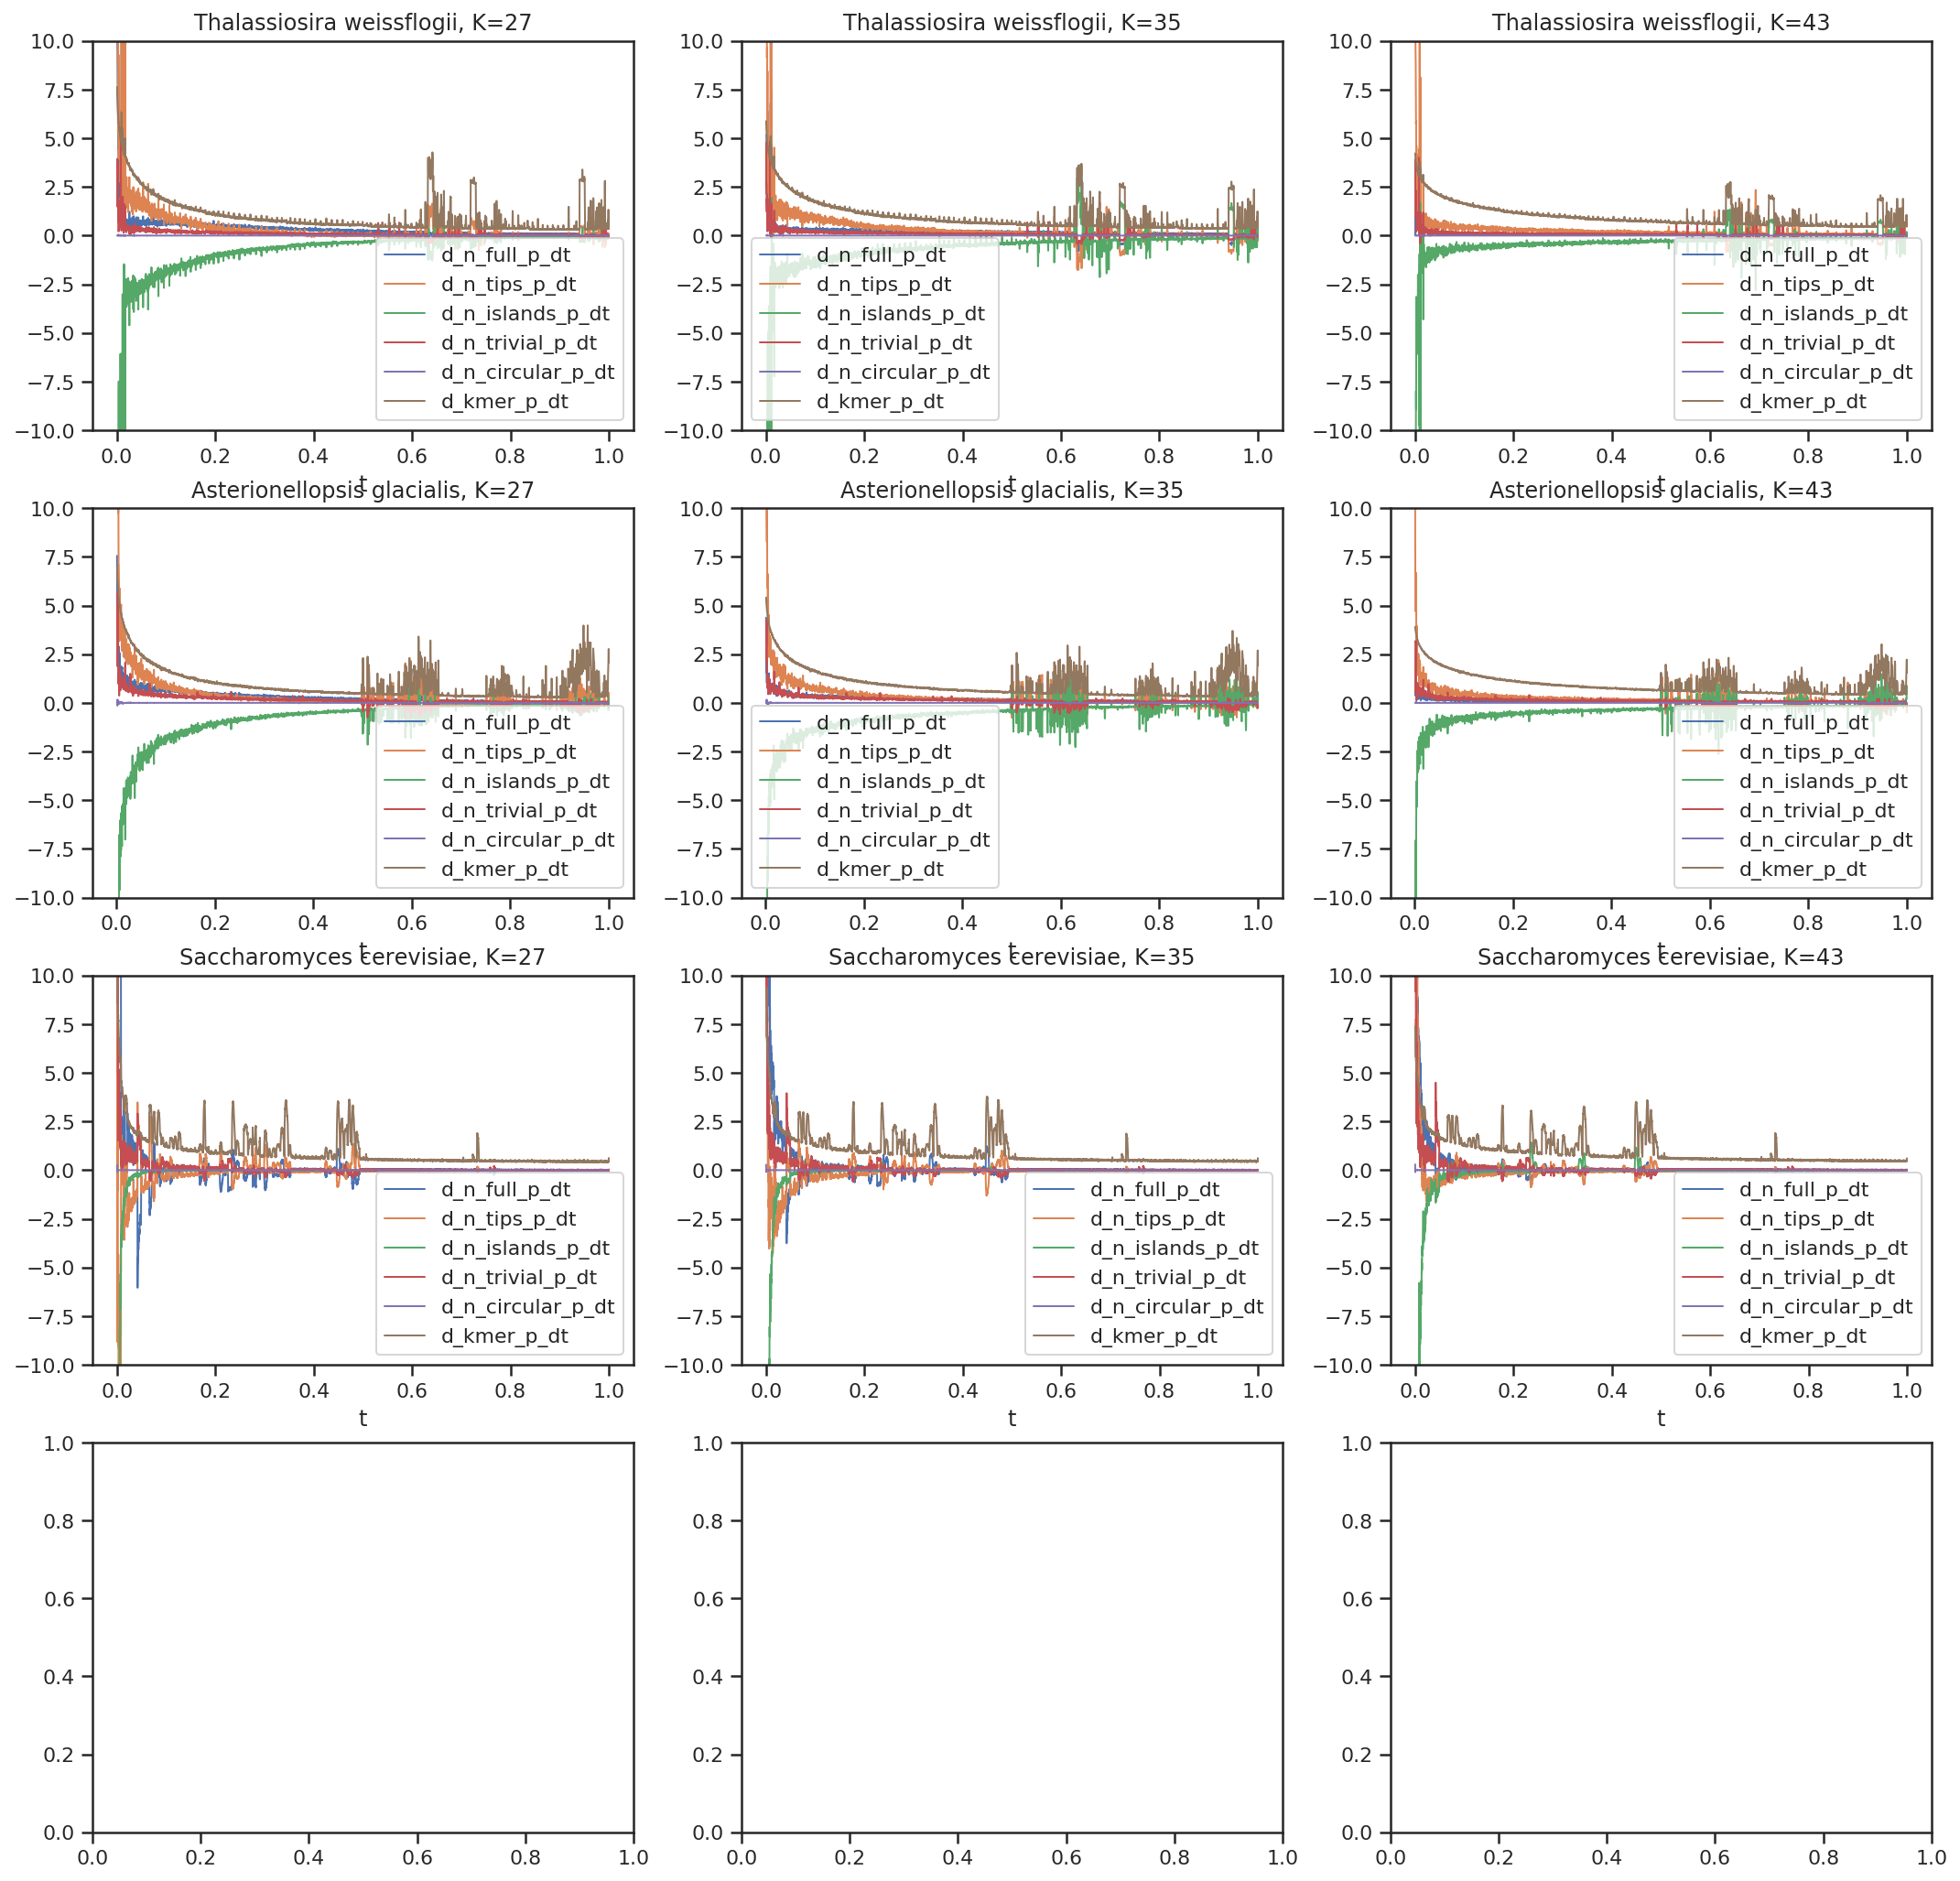

In [18]:
with FigureManager(figsize=(18,18), show=True, nrows=len(info['samples']), ncols=3) as (fig, ax):
    for n, sample_name in enumerate(info['samples']):
        for m, ksize in enumerate(info['samples'][sample_name]['ksizes']):
            directory  = os.path.join('outputs', sample_name, 'node_metrics')
            stats_file = os.path.join(directory, str(ksize), 'boink.cdbg.stats.csv')
            name       = '{0}, K={1}'.format(' '.join(sample_name.split('_')), ksize)

            try:
                plot_frequency(stats_file, name, lw=1, ax=ax[n][m])
            except FileNotFoundError:
                print('Compute not finished yet.')